# credit risk customers

###  A classification model using the Scikit-learn library on a dataset for credit risk customers. 
### The code includes data preprocessing, model training, evaluation, and visualization using the matplotlib library.

### Import necessary library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('credit_customers.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


Split it into features (X) and target (y)

In [2]:
# Split the data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 

Encode the categorical columns using LabelEncoder

In [3]:
# Encode categorical columns
categorical_cols = ['checking_status', 'credit_history', 'purpose', 'savings_status', 
                    'employment', 'personal_status', 'other_parties', 'property_magnitude', 
                    'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

splitting the data into training and testing sets then train a Decision Tree Classifier model on the training data and evaluate it on the testing data using confusion matrix and classification report

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [6]:
# Evaluate the model
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 29  30]
 [ 30 111]]
              precision    recall  f1-score   support

         bad       0.49      0.49      0.49        59
        good       0.79      0.79      0.79       141

    accuracy                           0.70       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.70      0.70      0.70       200



visualizing the decision tree using the plot_tree function from Scikit-learn and matplotlib libraries.

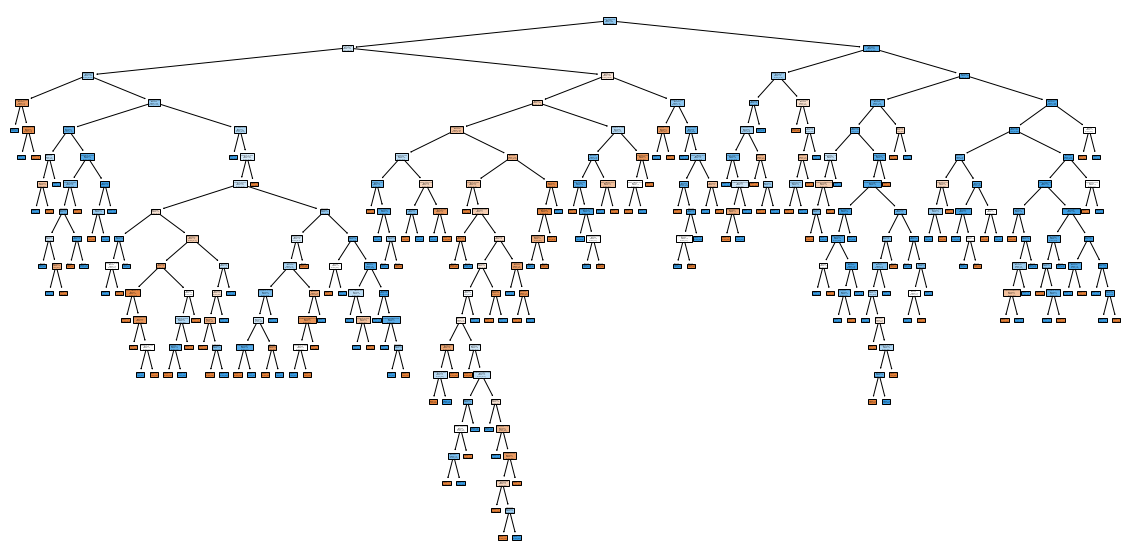

In [7]:
# Visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()